In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter

/Users/shailesh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(5)    # Random sample data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1577,ham,Remember all those whom i hurt during days of ...,NaN,NaN,NaN
1056,ham,Then u drive lor.,NaN,NaN,NaN
866,ham,"Same here, but I consider walls and bunkers an...",NaN,NaN,NaN
3080,ham,Have a great trip to India. And bring the ligh...,NaN,NaN,NaN
552,ham,"Sure, if I get an acknowledgement from you tha...",NaN,NaN,NaN


## DATA CLEANING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
# More than 95% of the data is missing in the last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
# Renaming the columns 
df.rename(columns={'v1':'result','v2':'input_text'},inplace=True)

In [8]:
df.sample(5)

,result,input_text
1403,ham,cool. We will have fun practicing making babies!
408,ham,Headin towards busetop
5533,ham,"Hey chief, can you give me a bell when you get..."
460,ham,Where did u go? My phone is gonna die you have...
1111,ham,"Awesome, think we can get an 8th at usf some t..."


In [9]:
encoder = LabelEncoder()

In [10]:
df['result'] = encoder.fit_transform(df['result'])

In [11]:
df.sample(5)

,result,input_text
4223,0,Double eviction this week - Spiral and Michael...
4344,0,Enjoy urself tmr...
5083,0,Aiya we discuss later lar... Pick Ì_ up at 4 i...
1651,0,I wan but too early lei... Me outside now wun ...
1194,0,Ok... C ya...


In [12]:
# Checking null values
df.isnull().sum() 

result        0
input_text    0
dtype: int64

In [13]:
# Check for duplicate records
df.duplicated().sum()

403

In [14]:
# Removing duplicates
df.drop_duplicates(keep='first',inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

## EDA (Exploratory Data Analysis)

In [17]:
df['result'].value_counts()

0    4516
1     653
Name: result, dtype: int64

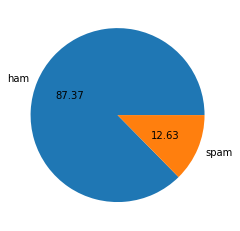

In [18]:
plt.pie(df['result'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [19]:
# Data is slightly imbalanced as ham is much more than spam

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/shailesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# Number of characters 
df['char_count'] = df['input_text'].apply(len)

In [22]:
df.head()

,result,input_text,char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# Number of words
df['word_count'] = df['input_text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,result,input_text,char_count,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
# Number of words
df['sent_count'] = df['input_text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,result,input_text,char_count,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df.describe()

,result,char_count,word_count,sent_count
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455407,1.961308
std,0.332253,58.236293,13.322448,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [28]:
df[df['result'] == 0].describe()

,result,char_count,word_count,sent_count
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123339,1.815545
std,0.0,56.358207,13.491315,1.364098
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [29]:
df[df['result'] == 1].describe()

,result,char_count,word_count,sent_count
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.969372
std,0.0,30.137753,7.008418,1.488910
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='char_count', ylabel='Count'>

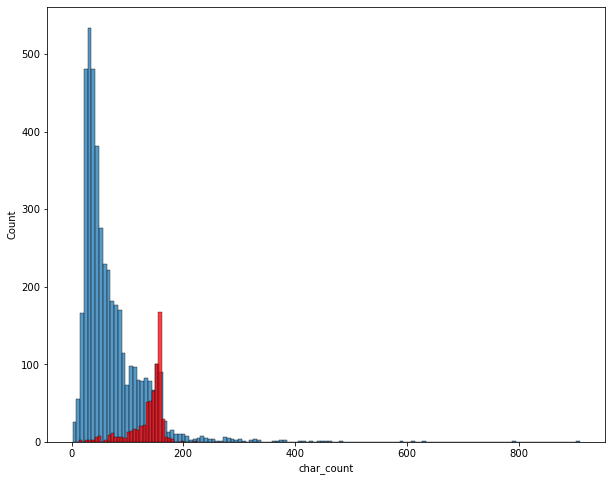

In [30]:
plt.figure(figsize=(10,8))
sns.histplot(df[df['result']==0]['char_count'])
sns.histplot(df[df['result']==1]['char_count'],color='red')

<AxesSubplot:xlabel='word_count', ylabel='Count'>

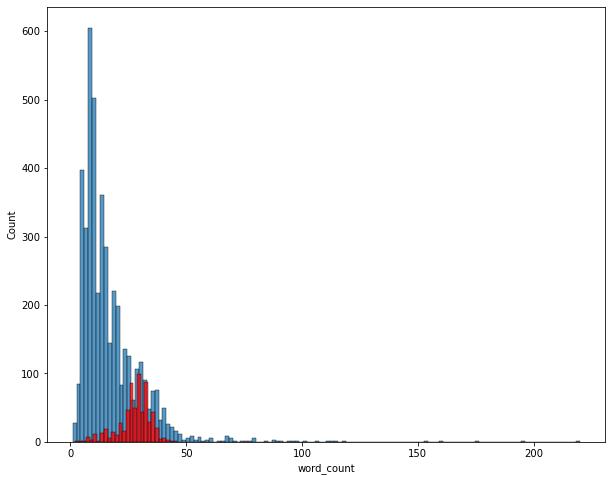

In [31]:
plt.figure(figsize=(10,8))
sns.histplot(df[df['result']==0]['word_count'])
sns.histplot(df[df['result']==1]['word_count'],color='red')

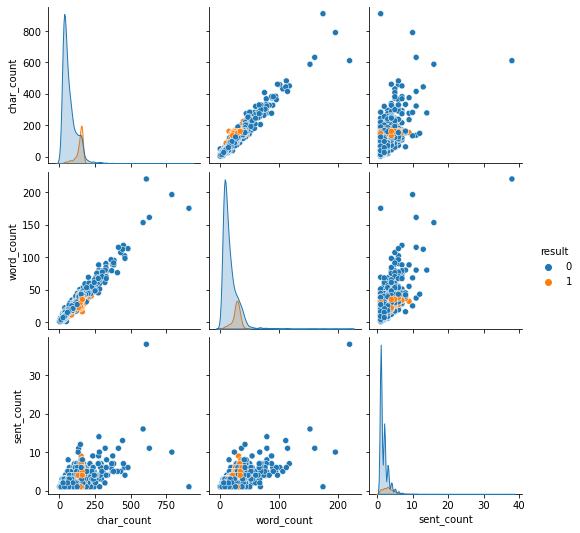

In [32]:
sns.pairplot(df,hue='result')

<AxesSubplot:>

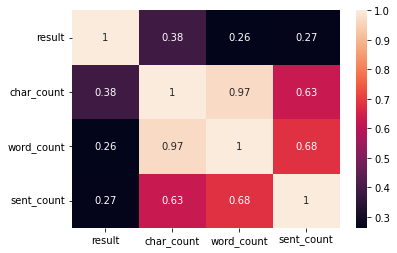

In [33]:
sns.heatmap(df.corr(),annot=True)

# Data Pre-processing
- Lower case
- Tokenization
- Removing special characters 
- Removing stop words and punctuations
- Stemming/Lemmitization

In [36]:
ps = PorterStemmer()

In [37]:
def trans_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []

    for each in text:
        if(each.isalnum()):
            y.append(each)

    text = y[:]
    y.clear()

    for each in text:
        if each not in stopwords.words('english') and each not in string.punctuation:
            y.append(each)

    text = y[:]
    y.clear()

    for each in text:
        y.append(ps.stem(each))

    return " ".join(y)

In [38]:
trans_text('I love the youtube lectures on Machine Learning, How about you?')

'love youtub lectur machin learn'

In [39]:
df['tf_text'] = df['input_text'].apply(trans_text)

In [40]:
df.sample(5)

,result,input_text,char_count,word_count,sent_count,tf_text
2347,0,But i dint slept in afternoon.,30,7,1,dint slept afternoon
2248,0,will you like to be spoiled? :),31,9,2,like spoil
3286,0,The gas station is like a block away from my h...,132,29,1,ga station like block away hous drive right si...
5523,0,Going to join tomorrow.,23,5,1,go join tomorrow
3945,0,How u doin baby girl ?? hope u are okay every ...,97,26,3,u doin babi girl hope u okay everi time call u...


In [41]:
wc = WordCloud(width=500, height=700, min_font_size=10, background_color='white')

In [42]:
spam_wc = wc.generate(df[df['result'] == 1]['tf_text'].str.cat(sep=' '))

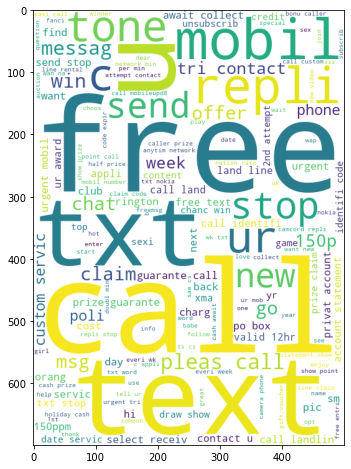

In [43]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [44]:
ham_wc = wc.generate(df[df['result'] == 0]['tf_text'].str.cat(sep=' '))

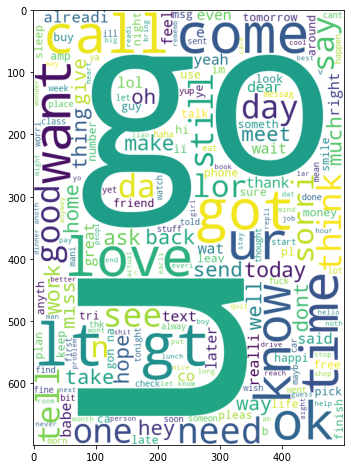

In [45]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)

In [46]:
df.head(5)

,result,input_text,char_count,word_count,sent_count,tf_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
spam_list = []
for msg in df[df['result'] == 1]['tf_text'].tolist():
    for word in msg.split():
        spam_list.append(word)


In [48]:
len(spam_list)

9939

/Users/shailesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


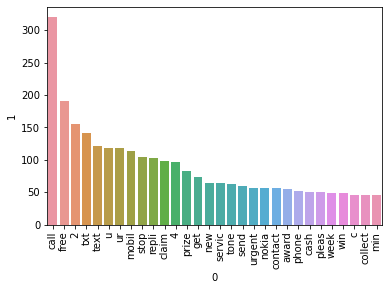

In [49]:
sns.barplot(pd.DataFrame(Counter(spam_list).most_common(30))[0],pd.DataFrame(Counter(spam_list).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
ham_list = []
for msg in df[df['result'] == 0]['tf_text'].tolist():
    for word in msg.split():
        ham_list.append(word)

In [51]:
len(ham_list)

35402

/Users/shailesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


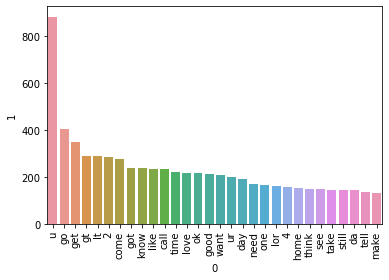

In [52]:
sns.barplot(pd.DataFrame(Counter(ham_list).most_common(30))[0],pd.DataFrame(Counter(ham_list).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [53]:
# Convert the input into vectors
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [54]:
X = tfidf.fit_transform(df['tf_text']).toarray()

In [55]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)''' # Reduces the precision score for MultinomialNB

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nX = scaler.fit_transform(X)'

In [56]:
'''# Appending the char_count attribute in the input(X)
X = np.hstack((X, df['char_count'].values.reshape(-1,1)))''' # Reduces the accuracy of MultinomialNB

"# Appending the char_count attribute in the input(X)\nX = np.hstack((X, df['char_count'].values.reshape(-1,1)))"

In [57]:
X.shape

(5169, 3000)

In [58]:
y = df['result'].values

In [59]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
# Train_Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [62]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8723404255319149
[[1202  158]
 [  40  151]]
0.4886731391585761


In [63]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9716312056737588
[[1360    0]
 [  44  147]]
1.0


In [64]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9819471308833011
[[1358    2]
 [  26  165]]
0.9880239520958084


In [65]:
# Tfidf --> mnb

### Model Improvement
- Change the max_features parameter of TfIdf
- Scaling of the input 
- Addition the char_count column in the input

## Model Selection
- As the dataset is slightly imbalanced, precision score is more important
- MultinomialNB classifier gives us the highest precision score and a high accuracy too, will be going ahead with this 

In [66]:
# Save the model to use in the stramlit app
import pickle 
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))